## 1. Descriptive Statistics:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/NRA.csv")

In [15]:
df.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C03424V04122,Local Authority,C03122V03774,Type of Carriageway,UNIT,VALUE
0,NRA03,National Route Length,2015,2015,-,All licensing authorities,-,All Carriage ways,Number,5306.0
1,NRA03,National Route Length,2015,2015,-,All licensing authorities,1,Motorway,Number,916.0
2,NRA03,National Route Length,2015,2015,-,All licensing authorities,3,Single,Number,4096.0
3,NRA03,National Route Length,2015,2015,-,All licensing authorities,4,Two plus one,Number,NaN
4,NRA03,National Route Length,2015,2015,-,All licensing authorities,5,Dual carriageway,Number,294.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATISTIC            1080 non-null   object 
 1   STATISTIC Label      1080 non-null   object 
 2   TLIST(A1)            1080 non-null   int64  
 3   Year                 1080 non-null   int64  
 4   C03424V04122         1080 non-null   object 
 5   Local Authority      1080 non-null   object 
 6   C03122V03774         1080 non-null   object 
 7   Type of Carriageway  1080 non-null   object 
 8   UNIT                 1080 non-null   object 
 9   VALUE                807 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 84.5+ KB


In [17]:
# Check for missing values
print(df.isnull().sum())

STATISTIC                0
STATISTIC Label          0
TLIST(A1)                0
Year                     0
C03424V04122             0
Local Authority          0
C03122V03774             0
Type of Carriageway      0
UNIT                     0
VALUE                  273
dtype: int64


In [18]:
# Impute missing values in 'VALUE' column with mean
mean_value = df['VALUE'].mean()
df['VALUE'].fillna(mean_value, inplace=True)

In [19]:
# Check for missing values
print(df.isnull().sum())

STATISTIC              0
STATISTIC Label        0
TLIST(A1)              0
Year                   0
C03424V04122           0
Local Authority        0
C03122V03774           0
Type of Carriageway    0
UNIT                   0
VALUE                  0
dtype: int64


## 2. Convert Categorical Variables:

In [20]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['STATISTIC', 'STATISTIC Label', 'C03424V04122', 'Local Authority', 'C03122V03774', 'Type of Carriageway', 'UNIT'], drop_first=True)


## Scaling Numerical Variables (if needed):

In [21]:
from sklearn.preprocessing import StandardScaler

# Scale numerical variables (e.g., 'TLIST(A1)', 'Year', 'VALUE')
numerical_columns = ['TLIST(A1)', 'Year', 'VALUE']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])


In [22]:
# Identify and handle outliers using Z-score
from scipy.stats import zscore

z_scores = zscore(df_encoded[numerical_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_encoded = df_encoded[filtered_entries]


In [23]:
# Check the final data
print(df_encoded.head())

# Overview of the preprocessed data
print(df_encoded.info())


   TLIST(A1)      Year     VALUE  C03424V04122_1  C03424V04122_10  \
1  -1.527525 -1.527525  1.242228               0                0   
3  -1.527525 -1.527525  0.000000               0                0   
4  -1.527525 -1.527525  0.147322               0                0   
5  -1.527525 -1.527525 -0.232903               1                0   
6  -1.527525 -1.527525 -0.327959               1                0   

   C03424V04122_11  C03424V04122_12  C03424V04122_13  C03424V04122_14  \
1                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   
5                0                0                0                0   
6                0                0                0                0   

   C03424V04122_15  ...  Local Authority_Wexford  Local Authority_Wicklow  \
1                0  ...                        0                     

In [24]:
# Summary statistics
summary_stats = df_encoded.describe(include='all')

# Unique values for categorical columns
unique_vals = {col: df_encoded[col].unique() for col in df_encoded.select_dtypes(include='object').columns}

print("Summary Statistics:")
print(summary_stats)
print("\nUnique Values for Categorical Columns:")
for col, vals in unique_vals.items():
    print(f"\n{col}:\n{vals}")


Summary Statistics:
          TLIST(A1)          Year        VALUE  C03424V04122_1  \
count  1.064000e+03  1.064000e+03  1064.000000     1064.000000   
mean   5.342427e-17  5.342427e-17    -0.118122        0.037594   
std    1.000470e+00  1.000470e+00     0.233772        0.190302   
min   -1.527525e+00 -1.527525e+00    -0.370206        0.000000   
25%   -7.637626e-01 -7.637626e-01    -0.313876        0.000000   
50%    0.000000e+00  0.000000e+00    -0.155449        0.000000   
75%    7.637626e-01  7.637626e-01     0.000000        0.000000   
max    1.527525e+00  1.527525e+00     1.381291        1.000000   

       C03424V04122_10  C03424V04122_11  C03424V04122_12  C03424V04122_13  \
count      1064.000000      1064.000000      1064.000000      1064.000000   
mean          0.037594         0.037594         0.037594         0.037594   
std           0.190302         0.190302         0.190302         0.190302   
min           0.000000         0.000000         0.000000         0.000000   


In [25]:
# Correlation matrix
correlation_matrix = df_encoded.corr()

# Pairwise correlation with 'VALUE'
correlation_with_value = df_encoded.corrwith(df_encoded['VALUE'])

print("Correlation Matrix:")
print(correlation_matrix)
print("\nCorrelation with 'VALUE':")
print(correlation_with_value)


Correlation Matrix:
                                         TLIST(A1)          Year     VALUE  \
TLIST(A1)                             1.000000e+00  1.000000e+00  0.047404   
Year                                  1.000000e+00  1.000000e+00  0.047404   
VALUE                                 4.740403e-02  4.740403e-02  1.000000   
C03424V04122_1                       -8.084517e-17 -8.084517e-17 -0.072828   
C03424V04122_10                       5.485677e-18  5.485677e-18 -0.046222   
...                                            ...           ...       ...   
C03122V03774_5                       -2.594092e-17 -2.594092e-17 -0.380545   
Type of Carriageway_Dual carriageway -2.594092e-17 -2.594092e-17 -0.380545   
Type of Carriageway_Motorway          1.179015e-16  1.179015e-16 -0.141897   
Type of Carriageway_Single            1.772063e-16  1.772063e-16  0.045462   
Type of Carriageway_Two plus one     -1.028558e-16 -1.028558e-16  0.255136   

                                      C0342

In [29]:
# Display column names
print(df_encoded.columns)


Index(['TLIST(A1)', 'Year', 'VALUE', 'C03424V04122_1', 'C03424V04122_10',
       'C03424V04122_11', 'C03424V04122_12', 'C03424V04122_13',
       'C03424V04122_14', 'C03424V04122_15', 'C03424V04122_16',
       'C03424V04122_17', 'C03424V04122_18', 'C03424V04122_19',
       'C03424V04122_2', 'C03424V04122_20', 'C03424V04122_21',
       'C03424V04122_22', 'C03424V04122_23', 'C03424V04122_24',
       'C03424V04122_25', 'C03424V04122_26', 'C03424V04122_3',
       'C03424V04122_4', 'C03424V04122_5', 'C03424V04122_6', 'C03424V04122_7',
       'C03424V04122_8', 'C03424V04122_9', 'Local Authority_Carlow',
       'Local Authority_Cavan', 'Local Authority_Clare',
       'Local Authority_Cork', 'Local Authority_Donegal',
       'Local Authority_Dublin', 'Local Authority_Galway',
       'Local Authority_Kerry', 'Local Authority_Kildare',
       'Local Authority_Kilkenny', 'Local Authority_Laois',
       'Local Authority_Leitrim', 'Local Authority_Limerick',
       'Local Authority_Longford', 'Local

In [30]:
# Display the first few rows of the DataFrame
print(df_encoded.head())

   TLIST(A1)      Year     VALUE  C03424V04122_1  C03424V04122_10  \
1  -1.527525 -1.527525  1.242228               0                0   
3  -1.527525 -1.527525  0.000000               0                0   
4  -1.527525 -1.527525  0.147322               0                0   
5  -1.527525 -1.527525 -0.232903               1                0   
6  -1.527525 -1.527525 -0.327959               1                0   

   C03424V04122_11  C03424V04122_12  C03424V04122_13  C03424V04122_14  \
1                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   
5                0                0                0                0   
6                0                0                0                0   

   C03424V04122_15  ...  Local Authority_Wexford  Local Authority_Wicklow  \
1                0  ...                        0                     

## 3. Hypothesis Testing (if applicable):
Perform hypothesis tests based on our specific research questions. For example, if you have two groups ('Group A' and 'Group B'), and you want to test if there's a significant difference in the 'VALUE' between them:

In [31]:
from scipy.stats import ttest_ind

# Assuming 'Type of Carriageway' is a categorical variable with two groups
group1_values = df_encoded[df_encoded['Type of Carriageway_Dual carriageway'] == 1]['VALUE']
group2_values = df_encoded[df_encoded['Type of Carriageway_Single'] == 1]['VALUE']

t_stat, p_value = ttest_ind(group1_values, group2_values)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -11.48015309145236
P-value: 9.817342635335602e-27


## 2. ANOVA

In [32]:
from scipy.stats import f_oneway

# Assuming 'Type of Carriageway' is a categorical variable with multiple groups
anova_result = f_oneway(df_encoded['VALUE'][df_encoded['Type of Carriageway_Dual carriageway'] == 1],
                        df_encoded['VALUE'][df_encoded['Type of Carriageway_Single'] == 1],
                        df_encoded['VALUE'][df_encoded['Type of Carriageway_Motorway'] == 1])

print("ANOVA Result:")
print(anova_result)


ANOVA Result:
F_onewayResult(statistic=37.79365473139039, pvalue=3.0865942532429685e-16)


In [33]:
# Selecting relevant features and target variable
X = df_encoded.drop(columns=['VALUE'])
y = df_encoded['VALUE']


## Splitting the Data:
Next, we'll split the data into training and testing sets.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model 1: Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Linear Regression model
linear_reg = LinearRegression()

# GridSearchCV for hyperparameter tuning
param_grid_linear = {'fit_intercept': [True, False]}
grid_search_linear = GridSearchCV(linear_reg, param_grid_linear, cv=5)
grid_search_linear.fit(X_train, y_train)

# Best parameters
best_params_linear = grid_search_linear.best_params_

# Predictions
y_pred_linear = grid_search_linear.predict(X_test)

# Evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"Best Parameters: {best_params_linear}")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")


Linear Regression Results:
Best Parameters: {'fit_intercept': True}
Mean Squared Error: 0.026593398525998888
R-squared: 0.5443209169704236


## Model 2: Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression model
random_forest = RandomForestRegressor(random_state=42)

# GridSearchCV for hyperparameter tuning
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best parameters
best_params_rf = grid_search_rf.best_params_

# Predictions
y_pred_rf = grid_search_rf.predict(X_test)

# Evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Results:")
print(f"Best Parameters: {best_params_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")



Random Forest Regression Results:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.02897628133523979
R-squared: 0.5034901125728479


## Model Comparison:

In [37]:
# Compare Models
print("\nModel Comparison:")
print(f"Linear Regression - R-squared: {r2_linear}")
print(f"Random Forest Regression - R-squared: {r2_rf}")


Model Comparison:
Linear Regression - R-squared: 0.5443209169704236
Random Forest Regression - R-squared: 0.5034901125728479


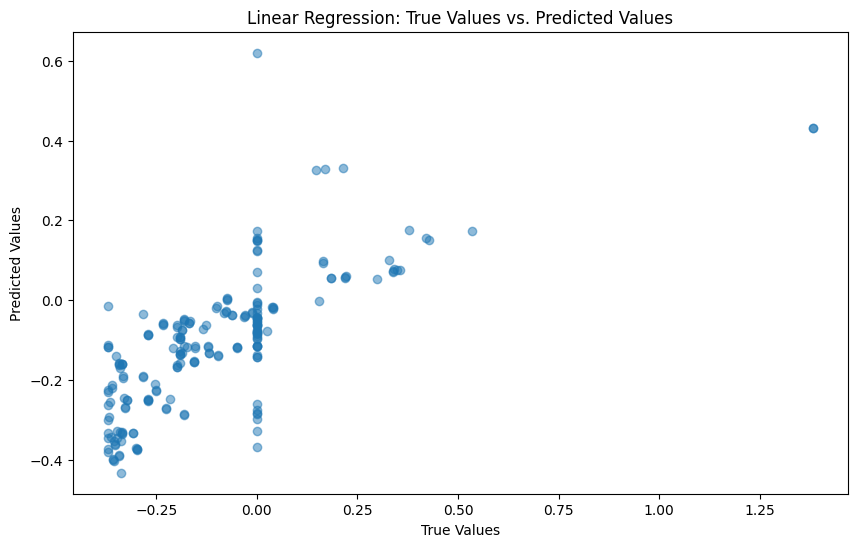

In [38]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.title('Linear Regression: True Values vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


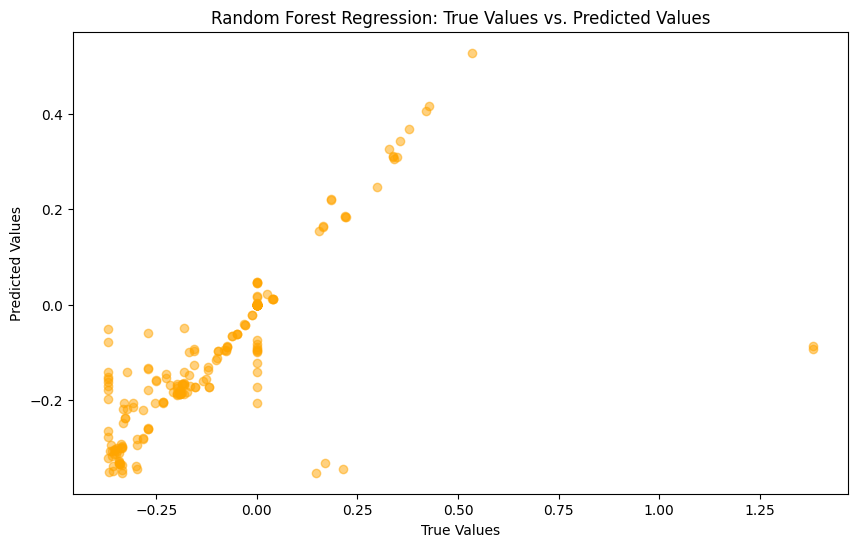

In [39]:
# Scatter plot for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='orange')
plt.title('Random Forest Regression: True Values vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()
